# The `Titanic` challenge

## Goal

This project aims to predict the likelihood of the passengers surviving the Titanic impact (i.e., the `Survived` feature).

The steps I followed where the next:

1. Set the random seed to enable reproducibility
1. Feature pre-processing (e.g., remove useless features, impute missing values, encode some features)
3. Check pairwise correlations among features
4. Split training and test data. When splitting train and test datasets, the test dataset should contain 30% of the data.
5. Plot the training dataset in 2D, are the outcomes well-separated?
6. Train at least two ML classification models
7. Perform hyperparameter optimization for at least one model
8. Identify the most relevant features in the prediction

In [10]:
import numpy as np
np.random.seed(89)

In [1]:
import pandas as pd
seed = 42  # set random seed for reproducibility
df = pd.read_csv('https://raw.githubusercontent.com/w4bo/AA2425-unibo-mldm/refs/heads/master/slides/datasets/titanic/train.csv')  # load the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Schema of the dataset

|Attribute|Description|Value|
|---------|-----------|-----|
|survival| 	Survival| 	0 = No, 1 = Yes|
|pclass| 	Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| 	Sex 	||
|Age| 	Age in years| 	|
|sibsp| 	# of siblings / spouses aboard the Titanic |	|
|parch| 	# of parents / children aboard the Titanic 	||
|ticket| 	Ticket number 	||
|fare| 	Passenger fare 	||
|cabin| 	Cabin number 	||
|embarked| 	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
df['Embarked'].value_counts(dropna=False)  #Just two so let's fill with the mode

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [8]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)


In [12]:
df['Embarked'].isnull().sum()  #Check if there are still null values

np.int64(0)

In [7]:
df.Age.value_counts(dropna=False)

,count
Age,
NaN,177
24.00,30
22.00,27
18.00,26
28.00,25
...,...
24.50,1
0.67,1
0.42,1


In [13]:
#Replacing the null values with random inputing for not altering the distribution

mean_age = df['Age'].mean()
std_age = df['Age'].std()

n_missing = df['Age'].isnull().sum()

random_ages = np.random.normal(loc=mean_age, scale=std_age, size=n_missing)

#Making sure that there are no negative values
random_ages = np.clip(random_ages, a_min=0, a_max=None)

# Replacing NaNs with the randomly generated values
df.loc[df['Age'].isnull(), 'Age'] = random_ages


In [15]:
df['Age'].isnull().sum() # Checking if there are still null values

np.int64(0)

In [19]:
df['Cabin'].value_counts(dropna=False, normalize = True) #The proportion of NaN is too high

,proportion
Cabin,
NaN,0.771044
G6,0.004489
C23 C25 C27,0.004489
B96 B98,0.004489
F2,0.003367
...,...
E17,0.001122
A24,0.001122
C50,0.001122


In [20]:
del df['Cabin'] # So let's delete that column

In [22]:
df = df.drop(['Name', 'PassengerId'], axis=1)  #We drop the identifiers

In [25]:
df.drop('Ticket', axis=1, inplace=True)

In [26]:
df.info() #Now we don't have any null values. Let's move on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


## Encoding

In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #Enconding for Sex variable

In [17]:
df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [27]:
df.head(2) #Checking it

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C


In [31]:
df.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


In [32]:
pclass_encoded = pd.get_dummies(df['Pclass'], prefix='Pclass') #Onehot for Pclass

df = pd.concat([df, pclass_encoded], axis=1)

df.drop('Pclass', axis=1, inplace=True)

df.head(2)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False,False


In [28]:
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked') #Onehot for embarked

df = pd.concat([df, embarked_encoded], axis=1)

df.drop('Embarked', axis=1, inplace=True)

df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False


## Checking pairwise correlation

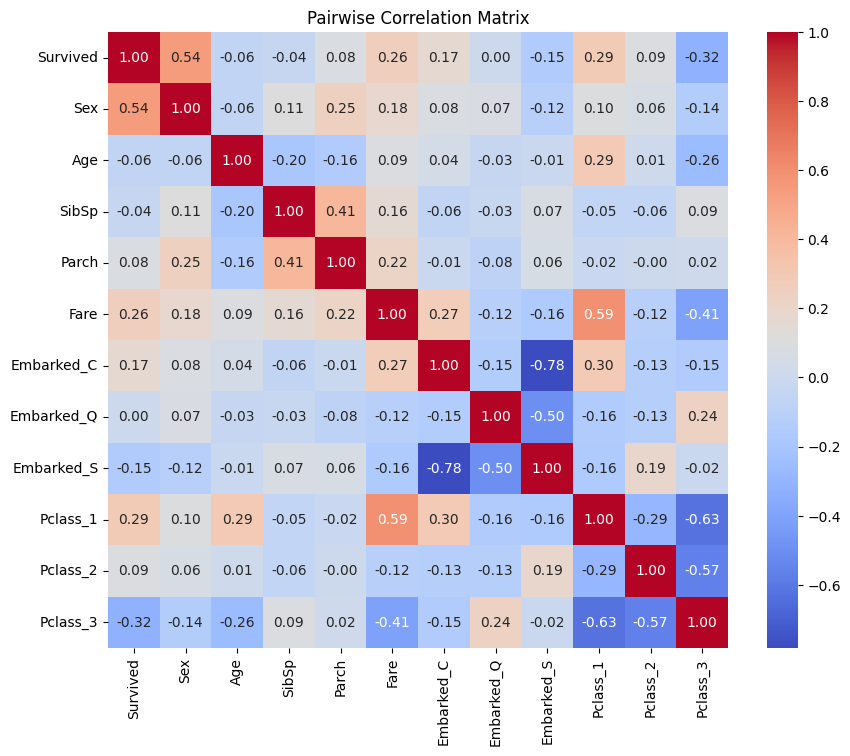

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Correlation Matrix")
plt.show()

In [34]:
df.corr()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
Survived,1.000000,0.543351,-0.064881,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308
Sex,0.543351,1.000000,-0.064706,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,0.098013,0.064746,-0.137143
Age,-0.064881,-0.064706,1.000000,-0.195326,-0.155455,0.090051,0.040481,-0.032803,-0.014820,0.289858,0.013900,-0.261055
SibSp,-0.035322,0.114631,-0.195326,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548
Parch,0.081629,0.245489,-0.155455,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790
Fare,0.257307,0.182333,0.090051,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333
Embarked_C,0.168240,0.082853,0.040481,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329
Embarked_Q,0.003650,0.074115,-0.032803,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449
Embarked_S,-0.149683,-0.119224,-0.014820,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104
Pclass_1,0.285904,0.098013,0.289858,-0.054582,-0.017633,0.591711,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738


From the correlation analysis we can conclude that:

- Sex has the strongest positive correlation with survival (0.54)
Indicates that being female significantly increased the chance of survival on the Titanic.

- Pclass_1 is positively correlated with survival (0.29), while Pclass_3 is negatively correlated (-0.32)
Passengers in 1st class had better survival outcomes, while those in 3rd class fared worse.

- Fare and Embarked_C show moderate positive correlations with survival (0.26 and 0.17)
Higher ticket prices and boarding at Cherbourg are associated with higher survival rates.

## Splitting

In [40]:
target = 'Survived'
seed = 21

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(target, axis=1)
y =df[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## Plotting Xtrain

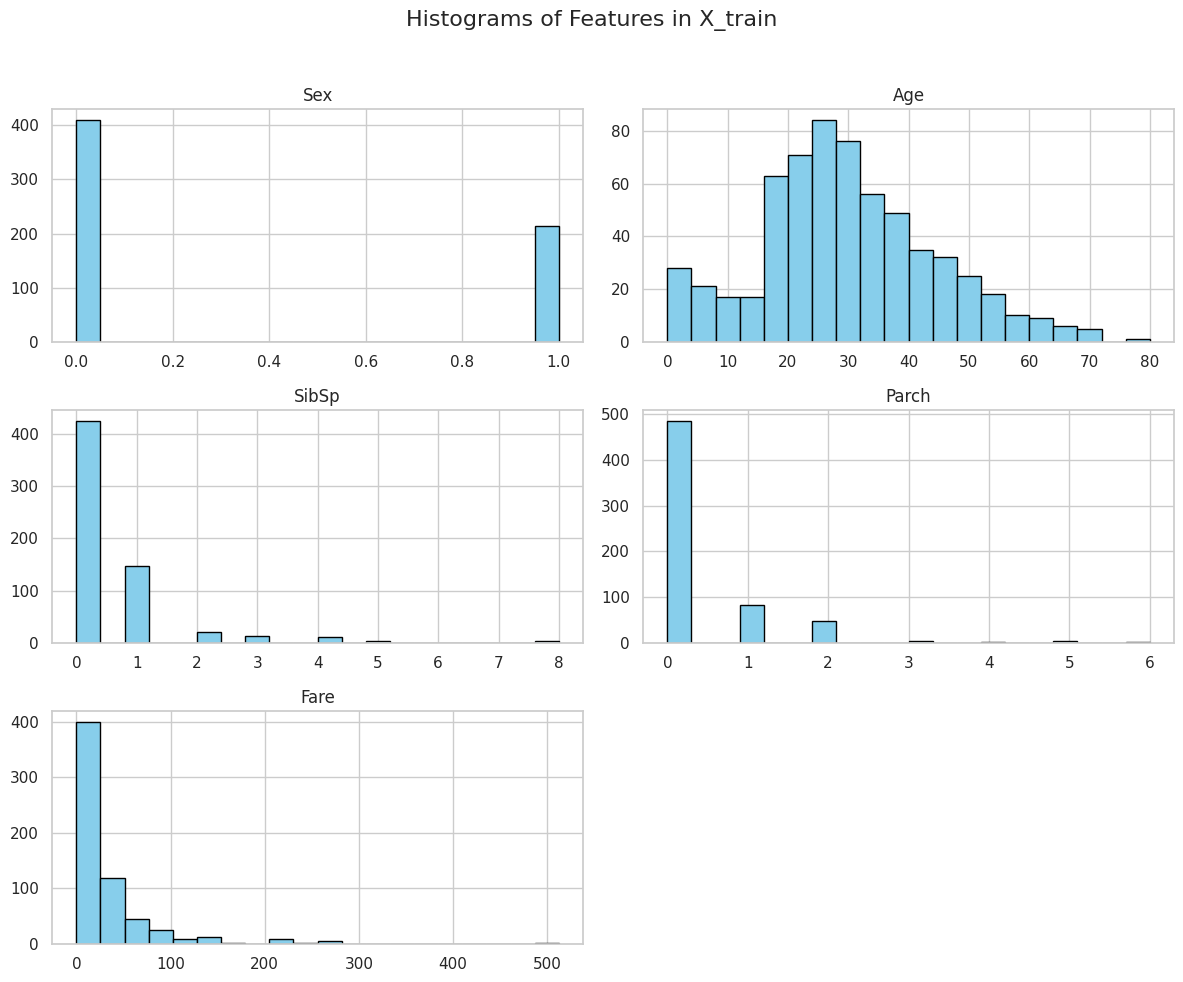

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")




# Crear histogramas para cada característica
X_train.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features in X_train", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Fare, parch and SibSp are right-skewed, age follows the normal distribution.

## AutoML

This is for knowing in advance which models are likely to work better performing this classification task

In [43]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00


In [44]:
from lazypredict.Supervised import LazyClassifier

In [56]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=42)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)



print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 235, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377207 -> initscore=-0.501420
[LightGBM] [Info] Start training from score -0.501420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

We select to use KNeighborsClassifier and SVC

## Training

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [57]:

knn = KNeighborsClassifier()
svc = SVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)


def print_metrics(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred, average='macro'):.4f}\n")


print_metrics("KNeighborsClassifier", y_test, y_pred_knn)
print_metrics("SVC", y_test, y_pred_svc)

--- KNeighborsClassifier ---
Accuracy : 0.7052
Precision: 0.7003
Recall   : 0.6669
F1 Score : 0.6705

--- SVC ---
Accuracy : 0.6903
Precision: 0.7234
Recall   : 0.6278
F1 Score : 0.6174



## Hyperparameter optimization

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [61]:
# Ya está entrenado como parte de grid_search.fit, pero podrías hacerlo explícitamente:
best_knn.fit(X_train, y_train)

# Predicciones
y_pred = best_knn.predict(X_test)
print_metrics("KNeighborsClassifier", y_test, y_pred)

--- KNeighborsClassifier ---
Accuracy : 0.7612
Precision: 0.7542
Recall   : 0.7401
F1 Score : 0.7448



As we can see, every single metric improved its result after the hyperparameter optimization

Now, we'll use permutation importance for finding the most relevant features because, since KNeighborsClassifier is a non-parametric, instance-based model, it does not learn explicit feature weights or coefficients during training.

As a result, traditional methods of assessing feature importance (like examining model parameters) are not applicable. Permutation importance provides a model-agnostic approach by measuring the decrease in prediction performance when the values of each feature are randomly shuffled.

Top 10 most relevant features (by permutation):
Feature 4 - Importance: 0.1878
Feature 1 - Importance: 0.0704
Feature 0 - Importance: 0.0664
Feature 2 - Importance: 0.0198
Feature 6 - Importance: 0.0041
Feature 5 - Importance: 0.0038
Feature 8 - Importance: 0.0033
Feature 7 - Importance: 0.0015
Feature 3 - Importance: -0.0003
Feature 9 - Importance: -0.0004


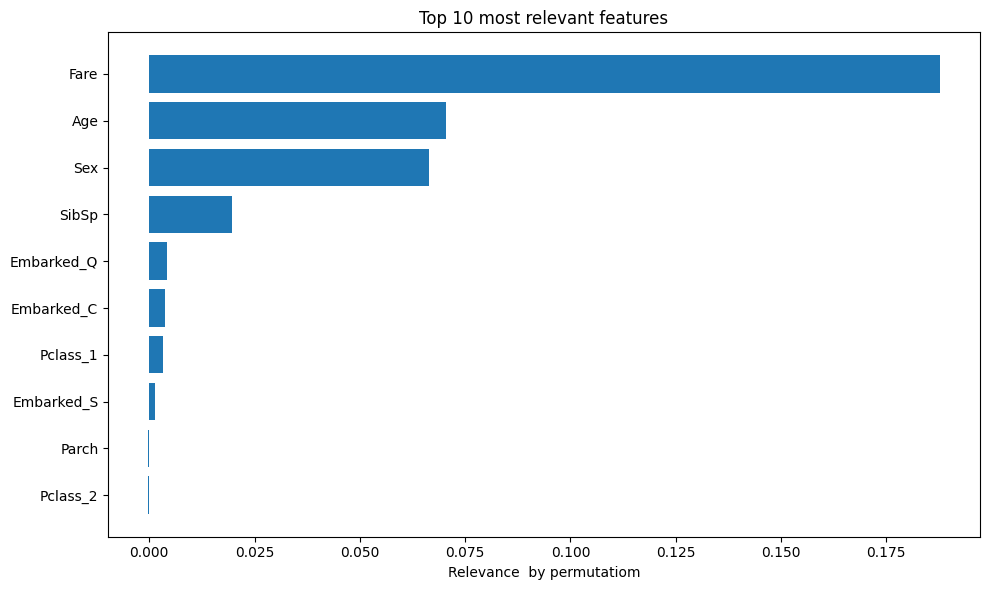

In [63]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(best_knn, X_test, y_test, scoring='f1_macro', n_repeats=10, random_state=42)


sorted_idx = result.importances_mean.argsort()[::-1]


print("Top 10 most relevant features (by permutation):")
for i in sorted_idx[:10]:
    print(f"Feature {i} - Importance: {result.importances_mean[i]:.4f}")


plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx[:10]][::-1], result.importances_mean[sorted_idx[:10]][::-1])
plt.xlabel("Relevance  by permutatiom")
plt.title("Top 10 most relevant features")
plt.tight_layout()
plt.show()


The permutation importance results suggest that features at indices 0.175 and around 0.75, which are Fare, Age & Sex have the greatest impact on the KNN model's performance.

This implies that changes in these features significantly influence the outcome, possibly because they capture key patterns or class separability in the data.